# Importing required Modules and Libraries

In [118]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import warnings
warnings.filterwarnings('ignore')

In [119]:
import string
from collections import Counter
import matplotlib.pyplot as plt

# Retrieving Tweets BEFORE coronaOutbreak

In [120]:
def get_tweets():
    import GetOldTweets3 as got
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('CoronaOutbreak') \
        .setSince("2020-02-01") \
        .setUntil("2020-03-01") \
        .setMaxTweets(1000)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of chosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

# Cleaning the text(tokenization/stopword removal/punctuations..)

In [121]:
# reading text file
text = ""
text_tweets = get_tweets()
length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

# converting to lowercase
lower_case = text.lower()

# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# splitting text into words
tokenized_words =  word_tokenize(cleaned_text, "english")

# Removing Stop Words
final_words = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

# Removing stop words from the tokenized words list
final_words = [word for word in tokenized_words if word not in stop_words]

# Emotion list for the above data

In [122]:
# Get emotions text
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)

Counter({' happy': 4, ' attracted': 3, ' attached': 3, ' free': 2, ' safe': 1, ' fearless': 1, ' powerless': 1, ' sad': 1, ' esteemed': 1, ' anxious': 1, ' average': 1})


# Emotional Words graph plotting

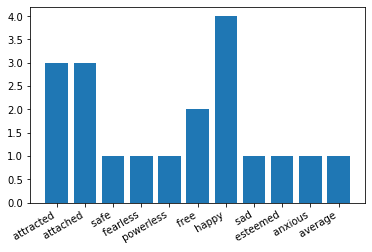

In [123]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

# Retrieving Tweets AFTER coronaOutbreak

In [128]:
def get_tweets():
    import GetOldTweets3 as got
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('Coronavirus') \
        .setSince("2020-07-01") \
        .setUntil("2020-08-01") \
        .setMaxTweets(1000)
    # Creation of list that contains all tweets
    tweets= got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of chosen tweet data
    text_tweets= [[tweet.text] for tweet in tweets]
    return text_tweets

# Cleaning the text(tokenization/stopword removal/punctuations..)

In [130]:
# reading text file
text = ""
text_tweets = get_tweets()
length= len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

# converting to lowercase
lower_case= text.lower()

# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# splitting text into words
tokenized_words =word_tokenize(cleaned_text, "english")

# Removing Stop Words
final_words = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

# Removing stop words from the tokenized words list
final_words = [word for word in tokenized_words if word not in stop_words]

# Emotion list for the above data

In [131]:
# Get emotions text
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)

Counter({' happy': 9, ' sad': 8, ' embarrassed': 3, ' powerless': 3, ' free': 3, ' attracted': 2, ' adequate': 2, ' attached': 2, ' cheated': 1, ' surprise': 1, ' belittled': 1, ' fearful': 1, ' entitled': 1, ' lost': 1, ' angry': 1, ' lustful': 1, ' hated': 1, ' fearless': 1, ' esteemed': 1, ' independent': 1, ' anxious': 1})


# Emotional Words graph plotting

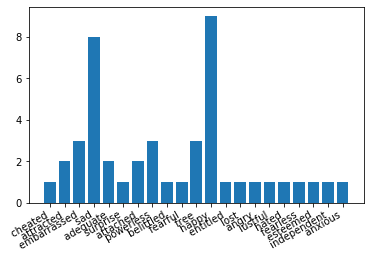

In [132]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph1.png')
plt.show()